 Criando gráficos em Python.

 O Python é muito bom para analisar dados e criar gráficos. Vou documentar a criação de alguns gráficos como histogramas e dispersão.

**Histogramas**

Criar histogramas com python é fácil utilizando bibliotecas como matplolib e seaborn por exemplo.

Escolhi um histograma das idades dos alunos presente no livro que utilizamos na aula de mecânica.

Uma das formas é definindo um bom bins, no caso do exemplo abaixo, escolhi um intervalor(range) entre 18 e 38 anos. Mas pode ser feito de um jeito manual também, escolhendo bins = 3 por exemplo.

In [ ]:
!pip install nbconvert

Media das idades 21.333333333333332


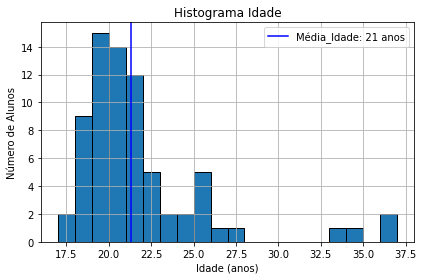

In [ ]:
#Bibliotecas em python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tabela = pd.read_excel("Histogramas.xlsx") #Aqui importamos os dados em Excel


# Criando o histograma para os dados da altura
# bins = range(17, 38) é o intervalo dos dados entre as idades entre 17 e 38
# rwidth : É um parâmetro opcional, é a largura relativa das barras 
# edgecolor é a cor entre as barras
plt.hist(tabela['Idade'], bins=range(17,38),rwidth=1,edgecolor="black")

# Colocando o título no histograma
plt.title("Histograma Idade")

# Podemos calcular a média também para colocar na legenda do histograma, vamos utilizar a biblioteca numpy para isso
media_idades = np.mean(tabela["Idade"]) # np é como chamamos a bibioteca numpy e mean(média) a função que vamos utilizar
print("Media das idades", media_idades) # mostrando o valor da média: 21 anos

# Criando uma legenda para o histograma
média = media_idades # Criando uma variável salvar o cálculo de média
cor = "blue" #Cor da legenda
plt.axvline(média, color=cor, label="Média_Idade: 21 anos") #Editando a legenda
plt.legend() # Fazendo aparece no gráfico

plt.grid() # São as barrinhas do histograma

# Colocando legenda nos Eixos
plt.xlabel("Idade (anos)")
plt.ylabel("Número de Alunos")

plt.tight_layout()
 

plt.show() #Plotando o histograma

Agora vamos criar o gráfico de dispersão no python, é bem tranquilo também. Só precisamos utilizar os dados das 2 grandezas que estamos trabalhando.

Uma coisa que é interessante também é calcular a **covariancia** dos dados para analisar o quão correlacionados eles são e o coeficente de Pearson.

**Coeficiente de correlação linear de Pearson(r) que varia o intervalo entre -1 e 1.**


\begin{equation}
 \boxed{r = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}} 
\end{equation}

Vamos reproduzir esse cálculo em python


,F(gf),l(mm),Media F (gf),Media l(mm)
0,3,9.2,11.714286,35.085714
1,4,12.2,DesvioPadrao F,Desvio Padrão l
2,5,15.0,8.557926,25.530533
3,10,30.0,NaN,NaN
4,15,44.6,NaN,NaN
5,20,59.5,NaN,NaN
6,25,75.1,NaN,NaN


A covariancia entre F(fg) e l(mm) é:  218.47857142857143
Coeficiente de Pearson (r) = 1.17


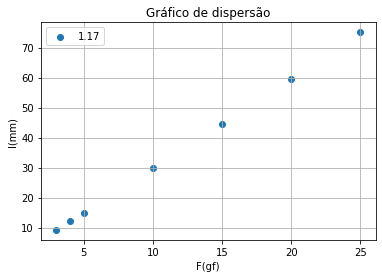

In [32]:
#Bibliotecas que vamos utilizar
import pandas as pd # Utilizamos para importar os dados do excel
import matplotlib.pyplot as plt # Utilizamos para editar o gráfico
import numpy as np #Utilizamos para realizar os cálculos

from numpy import std

tabela = pd.read_excel('/content/Gráfico_de_Dispersão(FG).xlsx') #aqui irá ler os dados em Excel
display(tabela) #vamos imprimir a tabelo de um jeito mais 

# Vamos calcular a covariancia para avaliar a correlação com a função cov
covariancia = np.cov(tabela["F(gf)"], tabela["l(mm)"])[0][1]
print("A covariancia entre F(fg) e l(mm) é: ", covariancia)

# Agora vamos calcular o desvio padrão de F e l, é bem simples utilizando a função std
dp_F = np.std(tabela["F(gf)"])
dp_L = np.std(tabela["l(mm)"])

#Calculando o coefiente de Person, quanto mais próximo de 1 mais forte é a correlação
r = covariancia/(dp_F*dp_L)
print("Coeficiente de Pearson (r) =", round(r,2))


plt.scatter(tabela['F(gf)'],tabela['l(mm)'],) #Aqui posso criar um gráfico de dispersão com os eixos x e y
plt.xlabel("F(gf)") #Colocando legendas no eixo x
plt.ylabel("l(mm)") #Colocando legendas no eixo 
plt.title("Gráfico de dispersão") #Colocando o titulo

#Colocando a legenda como valor de Pearson
plt.legend([1.17])

plt.grid() #Linhas de grade

plt.show() #Plotando

In [ ]:
!jupyter nbconvert --to html CalculosMecanica.ipynb

Podemos ver que analisando os calculos e gráficos, os dados apresentam uma forte correlação